In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
# pip install tensorflow ignore if already installed

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2025-11-11 09:13:27.801840: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-11 09:13:27.896057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-11 09:13:27.936288: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-11 09:13:27.947399: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-11 09:13:28.009245: I tensorflow/core/platform/cpu_feature_guar

In [3]:
df = pd.read_csv("Churn_Modelling.csv") 

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# 2. Distinguish the feature and target set
X = df.iloc[:, 3:13]   # Features (from CreditScore to EstimatedSalary)
y = df.iloc[:, 13]     # Target (Exited column)

In [6]:
# Encoding categorical variables (Geography and Gender)
labelencoder_gender = LabelEncoder()
X['Gender'] = labelencoder_gender.fit_transform(X['Gender'])


# One-hot encode Geography
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)

In [7]:
# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

print("Sample of normalized training data:")
display(X_train_df.head())

print("\nMean of features after scaling:\n", X_train_df.mean())
print("\nStandard deviation of features after scaling:\n", X_train_df.std())

Sample of normalized training data:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,0.356500,0.913248,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,-0.579467,-0.576388
1,-0.203898,0.913248,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,1.725723,-0.576388
2,-0.961472,0.913248,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,-0.579467,1.734942
3,-0.940717,-1.094993,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,-0.579467,-0.576388
4,-1.397337,0.913248,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,-0.579467,-0.576388



Mean of features after scaling:
 CreditScore          5.435652e-16
Gender               2.842171e-17
Age                 -1.896261e-16
Tenure               6.661338e-17
Balance             -3.099743e-16
NumOfProducts        1.065814e-16
HasCrCard           -3.197442e-17
IsActiveMember      -1.776357e-17
EstimatedSalary      1.776357e-17
Geography_Germany   -4.263256e-17
Geography_Spain     -7.194245e-17
dtype: float64

Standard deviation of features after scaling:
 CreditScore          1.000063
Gender               1.000063
Age                  1.000063
Tenure               1.000063
Balance              1.000063
NumOfProducts        1.000063
HasCrCard            1.000063
IsActiveMember       1.000063
EstimatedSalary      1.000063
Geography_Germany    1.000063
Geography_Spain      1.000063
dtype: float64


In [10]:
# 4. Initialize and build the Neural Network model
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/home/ajk1806/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-11 09:13:39.748684: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-11-11 09:13:39.748772: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: AJKs-VICTUS
2025-11-11 09:13:39.748780: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: AJKs-VICTUS
2025-11-11 09:13:39.748916: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 535.274.2
2025-11-11 09:13:39.748936: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostic

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

We are treating countries with ordinal values(0 < 1 < 2) but they are incomparable.
To solve this we can use one hot encoding.
We will perform some standardization 

In [12]:
# Train for 20 epochs
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5554 - loss: 0.7126 - val_accuracy: 0.8035 - val_loss: 0.5110
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.7902 - loss: 0.5134 - val_accuracy: 0.8035 - val_loss: 0.4592
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.7885 - loss: 0.4865 - val_accuracy: 0.8035 - val_loss: 0.4429
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.7932 - loss: 0.4727 - val_accuracy: 0.8035 - val_loss: 0.4355
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.7836 - loss: 0.4723 - val_accuracy: 0.8035 - val_loss: 0.4292
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.8016 - loss: 0.4532 - val_accuracy: 0.8035 - val_loss: 0.4271
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7915 - loss: 0.4621 - val_accuracy: 0.8035 - val_loss: 0.4240
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.7911 - loss: 0.4488 - val_

In [13]:
# Print accuracy per epoch
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("Accuracy per Epoch:\n")
for i in range(len(train_acc)):
    print(f"Epoch {i+1}: Training Accuracy = {train_acc[i]*100:.2f}%, Validation Accuracy = {val_acc[i]*100:.2f}%")

Accuracy per Epoch:

Epoch 1: Training Accuracy = 67.89%, Validation Accuracy = 80.35%
Epoch 2: Training Accuracy = 79.14%, Validation Accuracy = 80.35%
Epoch 3: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 4: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 5: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 6: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 7: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 8: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 9: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 10: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 11: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 12: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 13: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 14: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 15: Training Accuracy = 79.45%, Validation A

In [14]:
import matplotlib.pyplot as plt

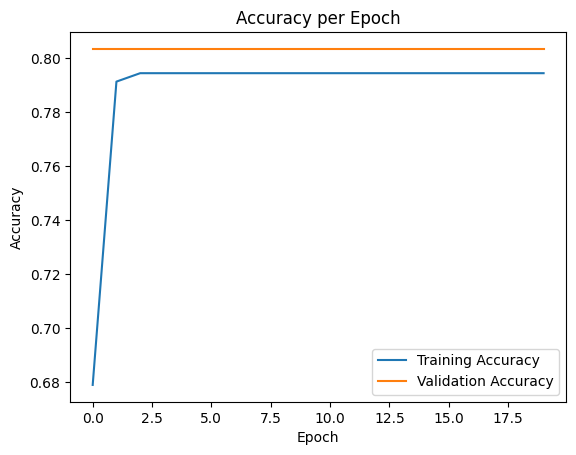

In [15]:
# Accuracy per epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().astype(int)

acc = accuracy_score(y_test, y_pred)
print("Final Accuracy: {:.2f}%".format(acc * 100))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
Final Accuracy: 80.35%


In [20]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1607    0]
 [ 393    0]]
